In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import linalg as LA

## Одномерные методы оптимизации

### Тестовые данные

In [2]:
foos = [ 
    lambda x: x**2,
    lambda x: -2 + 2*x + 2*x**2, 
    lambda x: -1*x + 3*x**3
]

ders = [
    lambda x: 2*x,
    lambda x: 3 + 4*x, 
    lambda x: 5 + 9*x**2
]

a = -10
b = 10
eps = [1e-3, 1e-4, 1e-6]

colors = ['r', 'g', 'b']

In [3]:
def print_interval_ratio(ratio):
    print('Отрезок уменьшился на', ratio)

In [4]:
def print_result(res, iters, func_iters):
    print('Результат:', res)
    print('Всего итераций: ', iters)
    print('Всего вычислений функций: ', func_iters)

In [5]:
def print_grad_result(res, iters, grad_steps):
    print('Результат:', res)
    print('Всего итераций: ', iters)
    print('Всего шагов градиента: ', grad_steps)

In [6]:
def get_next_interval(fdict, f, a, b, x1, x2):
    if (x1 not in fdict):
        v1 = f(x1)
        fdict[x1] = v1
    else:
        v1 = fdict[x1]
    
    if (x2 not in fdict):
        v2 = f(x2)
        fdict[x2] = v2
    else:
        v2 = fdict[x2]
    
    if (v1 < v2):
        return fdict, a, x2
    elif (v1 > v2):
        return fdict, x1, b
    else:
        return fdict, x1, x2

### Метод дихотомии

In [7]:
def bisection_search(f, a, b, fl=False, eps=1e-3):
    fdict = {}
    step = 0
    delta = eps/4
        
    while (abs(a - b) > eps):
        pred = a-b
        x1 = ((a + b) / 2) - delta
        x2 = ((a + b) / 2) + delta
        fdict, a, b = get_next_interval(fdict, f, a, b, x1, x2)
        step += 1
        if (fl):
            print_interval_ratio((a-b)/pred)
       
    return (a+b)/2, step, len(fdict)

In [8]:
res, iters, func_iters = bisection_search(foos[1], a, b, True)
print_result(res, iters, func_iters)

Отрезок уменьшился на 0.5000125
Отрезок уменьшился на 0.5000249993750158
Отрезок уменьшился на 0.5000499962502811
Отрезок уменьшился на 0.5000999825030621
Отрезок уменьшился на 0.5001999250281144
Отрезок уменьшился на 0.5003996902400639
Отрезок уменьшился на 0.5007987419813792
Отрезок уменьшился на 0.5015949360779527
Отрезок уменьшился на 0.5031797292261827
Отрезок уменьшился на 0.5063192713090265
Отрезок уменьшился на 0.5124808034517209
Отрезок уменьшился на 0.5243536994315886
Отрезок уменьшился на 0.5464451751899311
Отрезок уменьшился на 0.5849951235707728
Отрезок уменьшился на 0.6452920206445096
Отрезок уменьшился на 0.7251570079844005
Результат: -0.5000180168151857
Всего итераций:  16
Всего вычислений функций:  32


### Метод золотого сечения

In [9]:
def golden_search(f, a, b, fl=False, eps=1e-3):
    fdict = {}
    step = 0
    gold = (1+sqrt(5))/2

    delta = (b-a)/gold
    x1 = b - delta
    x2 = a + delta
    
    pred = a-b
    while (abs(a - b) > eps):
        pred = a-b
        fdict, a, b = get_next_interval(fdict, f, a, b, x1, x2)
        delta = (b-a)/gold
        if (a == x1):
            x1 = x2
            x2 = a + delta
        else:
            x2 = x1
            x1 = b - delta
        step += 1
        if (fl):
            print_interval_ratio((a-b)/pred)

    return (a+b)/2, step, len(fdict)

In [10]:
res, iters, func_iters = golden_search(foos[1], a, b, True)
print_result(res, iters, func_iters)

Отрезок уменьшился на 0.6180339887498948
Отрезок уменьшился на 0.6180339887498948
Отрезок уменьшился на 0.6180339887498948
Отрезок уменьшился на 0.6180339887498948
Отрезок уменьшился на 0.6180339887498948
Отрезок уменьшился на 0.6180339887498949
Отрезок уменьшился на 0.6180339887498948
Отрезок уменьшился на 0.6180339887498948
Отрезок уменьшился на 0.6180339887498947
Отрезок уменьшился на 0.6180339887498959
Отрезок уменьшился на 0.6180339887498949
Отрезок уменьшился на 0.6180339887498951
Отрезок уменьшился на 0.6180339887498949
Отрезок уменьшился на 0.6180339887498991
Отрезок уменьшился на 0.6180339887498953
Отрезок уменьшился на 0.6180339887499011
Отрезок уменьшился на 0.6180339887498969
Отрезок уменьшился на 0.6180339887498894
Отрезок уменьшился на 0.6180339887498931
Отрезок уменьшился на 0.6180339887498995
Отрезок уменьшился на 0.6180339887499248
Результат: -0.49985559561007314
Всего итераций:  21
Всего вычислений функций:  22


### Метод Фибоначчи

In [11]:
def fib(n):
    return 1/sqrt(5) * (((1+sqrt(5))/2)**n - ((1-sqrt(5))/2)**n)

In [12]:
def fibonacci_search(f, a, b, fl=False, eps=1e-3):
    fdict = {}
    
    n = 0
    while (fib(n+2) <= (b-a)/eps):
        n += 1
    
    x1 = a + fib(n)*(b-a)/fib(n+2)
    x2 = a + fib(n+1)*(b-a)/fib(n+2)
    step = 1
    
    while (abs(a - b) > eps):
        pred = a-b
        fdict, a, b = get_next_interval(fdict, f, a, b, x1, x2)
        if (a == x1):
            x1 = x2
            x2 = a + fib(n-step+2)*(b-a)/fib(n-step+3)
        else:
            x2 = x1
            x1 = a + fib(n-step+1)*(b-a)/fib(n-step+3)
        if (fl):
            print_interval_ratio((a-b)/pred)
        step += 1
        
    return (a+b)/2, step-1, len(fdict)

In [13]:
res, iters, func_iters = fibonacci_search(foos[1], a, b, True)
print_result(res, iters, func_iters)

Отрезок уменьшился на 0.618033988205325
Отрезок уменьшился на 0.6180339882053252
Отрезок уменьшился на 0.6180339869876299
Отрезок уменьшился на 0.618033985017358
Отрезок уменьшился на 0.6180339985218033
Отрезок уменьшился на 0.6180339631667066
Отрезок уменьшился на 0.6180340557275543
Отрезок уменьшился на 0.6180338134001252
Отрезок уменьшился на 0.6180344478216819
Отрезок уменьшился на 0.6180328440909663
Отрезок уменьшился на 0.6180371352785146
Отрезок уменьшился на 0.6180257510729614
Отрезок уменьшился на 0.6180555555555554
Отрезок уменьшился на 0.6179777704124293
Отрезок уменьшился на 0.6181818181818164
Отрезок уменьшился на 0.61764745094531
Отрезок уменьшился на 0.6190476190476162
Отрезок уменьшился на 0.615384615384623
Отрезок уменьшился на 0.6249989683469225
Отрезок уменьшился на 0.5999999999999949
Отрезок уменьшился на 0.666666666666681
Результат: -0.49991373359790037
Всего итераций:  21
Всего вычислений функций:  22


### График

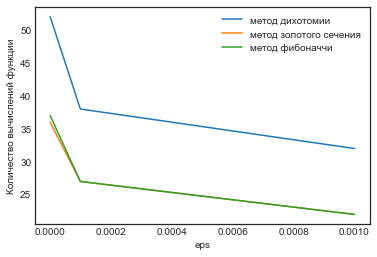

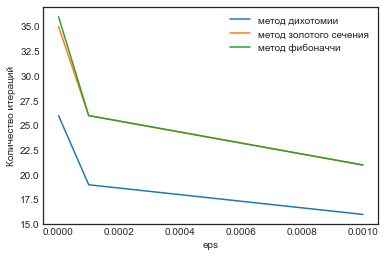

In [14]:
methods = {'метод дихотомии': bisection_search, 'метод золотого сечения': golden_search, 'метод фибоначчи': fibonacci_search}

all_iters = {}
all_func_comps = {}

f = foos[1]
for name, m in methods.items():
    all_iters[name] = []
    all_func_comps[name] = []
    for e in eps:
        res, iters, func_comps = m(f, a, b, False, e)
        all_iters[name].append(iters)
        all_func_comps[name].append(func_comps)

for name in methods.keys():
    plt.plot(eps, all_func_comps[name])
plt.legend(methods.keys())
plt.xlabel('eps')
plt.ylabel('Количество вычислений функции')
plt.show()

for name in methods.keys():
    plt.plot(eps, all_iters[name])
plt.legend(methods.keys())
plt.xlabel('eps')
plt.ylabel('Количество итераций')
plt.show()


## Градиентный спуск

In [15]:
def gradient_descent(f, der, optimizer, x, eps=1e-3):
    steps = 0
    iters = 0
    while (abs(der(x)) > eps):
        coeff, its, _ = optimizer(lambda coeff: f(x - coeff*der(x)), 0, 1)
        x -= coeff * der(x)
        steps += 1
        iters += its
        
    return x, iters, steps

In [16]:
res, iters, grad_steps = gradient_descent(foos[0], ders[0], fibonacci_search, 10, 0.01)
print_grad_result(res, iters, grad_steps)

Результат: -3.1345174633656825e-06
Всего итераций:  15
Всего шагов градиента:  1


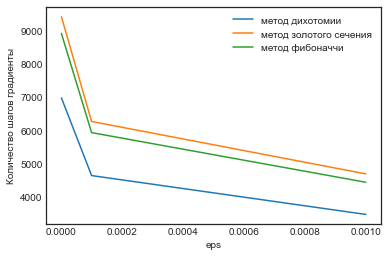

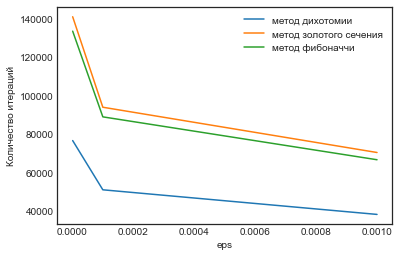

In [17]:
all_iters = {}
all_grad_steps = {}

f = foos[1]
der = ders[1]
for name, m in methods.items():
    all_iters[name] = []
    all_grad_steps[name] = []
    for e in eps:
        res, iters, grad_steps = gradient_descent(f, der, m, 10, e)
        all_iters[name].append(iters)
        all_grad_steps[name].append(grad_steps)

for name in methods.keys():
    plt.plot(eps, all_grad_steps[name])
plt.legend(methods.keys())
plt.xlabel('eps')
plt.ylabel('Количество шагов градиенты')
plt.show()

for name in methods.keys():
    plt.plot(eps, all_iters[name])
plt.legend(methods.keys())
plt.xlabel('eps')
plt.ylabel('Количество итераций')
plt.show()

## Градиентный спуск для квадратичной функции

In [18]:
def get_condition_num(Q):
    eigs = LA.eigvals(Q)
    min_eig = min(eigs)
    max_eig = max(eigs)
    c = max_eig/min_eig
    return c

In [19]:
def quadratic_gradient_descent(Q, x, eps, coeff=0.3):
    step = 0
    xs = [x]
    c = get_condition_num(Q)
    
    while (np.linalg.norm(Q * x) > eps):
        x -= np.linalg.norm(np.eye(len(Q)) - coeff*Q)*np.array(x)
        xs.append(list(x))
        step += 1
        
    return x, step, xs, c

### Тестовые данные

In [20]:
def get_grad_img(Q, grad_coords):
    x = np.linspace(-5, 5, 10)
    y = np.linspace(-5, 5, 10)

    X, Y = np.meshgrid(x, y)
    z = lambda x, y: (x**2)*Q[0][0] + 2*x*y*Q[0][1] + (y**2)*Q[1][1]
    Z = z(X, Y)

    contours = plt.contour(X, Y, Z, 3, colors='black')
    plt.clabel(contours, inline=True, fontsize=12)
    plt.imshow(Z, extent=[-5, 5, -5, 5], origin='lower') 
    plt.colorbar();

    gx, gy = zip(*grad_coords)
    plt.plot(gx, gy, color='black', marker='o')
    plt.show()

In [21]:
m = [np.array([[-2,1],[1,2]]),
     np.array([[4,1],[1,-2]]),
     np.array([[1,3,0],[3,2,2],[0,2,4]]),
     np.array([[1,2,2],[2,2,2],[2,2,1]])
    ]

In [22]:
mx = [[2., 1.], [1., 1.], [1., 1., 1.], [2., 2., 1.]]

Результат: [0.02910978 0.01455489]
Всего итераций:  12
Всего шагов градиента:  [[2.0, 1.0], [-1.4058772731852804, -0.7029386365926402], [0.9882454536294398, 0.4941227268147199], [-0.6946759117931536, -0.3473379558965768], [0.48831453830962857, 0.24415726915481428], [-0.3432551557877349, -0.17162757789386746], [0.24128731121282465, 0.12064365560641233], [-0.16961017357104702, -0.08480508678552351], [0.11922554416227288, 0.05961277208113644], [-0.08380824146044372, -0.04190412073022186], [0.058912050987431075, 0.029456025493715537], [-0.0414115567999809, -0.02070577839999045], [0.02910978327615725, 0.014554891638078625]]
Число обсусловленности:  -1.0


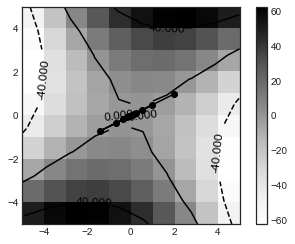

In [23]:
res, steps, coords, cond = quadratic_gradient_descent(m[0], mx[0], 0.1)
print_grad_result(res, steps, coords)
print('Число обсусловленности: ', cond)
get_grad_img(m[0], coords)

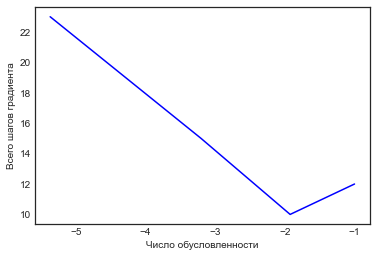

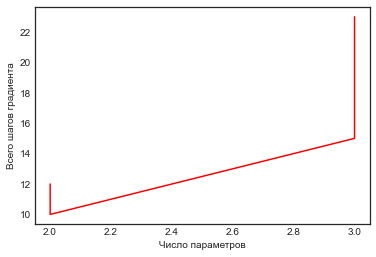

In [24]:
all_grad_steps = []
all_conds = []
all_ns = []


for i in range(len(m)):
    res, steps, grad_coords, cond = quadratic_gradient_descent(m[i], mx[i], 0.1, 0.3) 
    all_grad_steps.append(steps)
    all_conds.append(cond)
    all_ns.append(len(m[i]))

plt.plot(all_conds, all_grad_steps, color = 'blue')
plt.xlabel('Число обусловленности')
plt.ylabel('Всего шагов градиента')
plt.show()

plt.plot(all_ns, all_grad_steps, color = 'red')
plt.xlabel('Число параметров')
plt.ylabel('Всего шагов градиента')
plt.show()